<a href="https://colab.research.google.com/github/thnhpht/phantichdulieu_hocsau/blob/main/Lab_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
#1. Missing header
import pandas as pd
column_names=["ID", "Name", "Age", "Weight", "m0006", "m0612","m1218", "f006", "f0612", "f1218"]
patientheartrate = pd.read_csv('https://raw.githubusercontent.com/huynhhoc/phantichdulieu/main/Data/patient_heart_rate.csv', names = column_names)
patientheartrate.head(5)

,ID,Name,Age,Weight,m0006,m0612,m1218,f006,f0612,f1218
0,1.0,Mickéy Mousé,56.0,70kgs,72,69,71,-,-,-
1,2.0,Donald Duck,34.0,154.89lbs,-,-,-,85,84,76
2,3.0,Mini Mouse,16.0,NaN,-,-,-,65,69,72
3,4.0,Scrooge McDuck,NaN,78kgs,78,79,72,-,-,-
4,5.0,Pink Panther,54.0,198.658lbs,-,-,-,69,NaN,75


In [65]:
#2. Multi-variables in one columns
patientheartrate[['Firstname', 'Lastname']]=patientheartrate['Name'].str.split(expand = True)
patientheartrate.head(5)

,ID,Name,Age,Weight,m0006,m0612,m1218,f006,f0612,f1218,Firstname,Lastname
0,1.0,Mickéy Mousé,56.0,70kgs,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,Donald Duck,34.0,154.89lbs,-,-,-,85,84,76,Donald,Duck
2,3.0,Mini Mouse,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,Scrooge McDuck,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,Pink Panther,54.0,198.658lbs,-,-,-,69,NaN,75,Pink,Panther


In [66]:
#Xoa cot Name
patientheartrate = patientheartrate.drop('Name', axis = 1)
patientheartrate

,ID,Age,Weight,m0006,m0612,m1218,f006,f0612,f1218,Firstname,Lastname
0,1.0,56.0,70kgs,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,154.89lbs,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,198.658lbs,-,-,-,69,NaN,75,Pink,Panther
5,6.0,52.0,189lbs,-,-,-,68,75,72,Huey,McDuck
6,7.0,19.0,56kgs,-,-,-,71,78,75,Dewey,McDuck
7,8.0,32.0,78kgs,78,76,75,-,-,-,Scööpy,Doo
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
#3. Inconsitence values
weight=patientheartrate['Weight']
for i in range(len(weight)):
  x = str(weight[i])
  if "lbs" in x[-3:]:
    #remove the lbs from the value
    x = x[:-3:]
    float_x = float(x)
    y = int(float_x/2.205)
    y = str(y)+"kgs"
    weight[i] = y

patientheartrate.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,ID,Age,Weight,m0006,m0612,m1218,f006,f0612,f1218,Firstname,Lastname
0,1.0,56.0,70kgs,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,70kgs,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90kgs,-,-,-,69,NaN,75,Pink,Panther


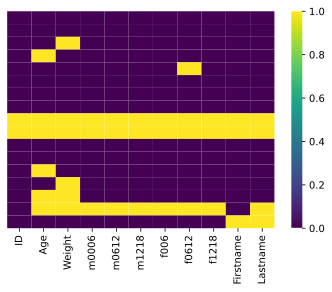

In [68]:
#4. Null values
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.heatmap(patientheartrate.isna(), 
            yticklabels=False, 
            cbar=True, 
            cmap='viridis')

patientheartrate.dropna(how="all", inplace = True)

In [69]:
#5. Duplicated values
patientheartrate = patientheartrate.drop_duplicates(subset=['Firstname','Lastname', 'Age', 'Weight'])
patientheartrate

,ID,Age,Weight,m0006,m0612,m1218,f006,f0612,f1218,Firstname,Lastname
0,1.0,56.0,70kgs,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,70kgs,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90kgs,-,-,-,69,NaN,75,Pink,Panther
5,6.0,52.0,85kgs,-,-,-,68,75,72,Huey,McDuck
6,7.0,19.0,56kgs,-,-,-,71,78,75,Dewey,McDuck
7,8.0,32.0,78kgs,78,76,75,-,-,-,Scööpy,Doo
11,10.0,12.0,45kgs,-,-,-,92,95,87,Louie,McDuck
12,11.0,NaN,60kgs,78,75,72,-,-,-,Henry,Nam


In [70]:
#6. Inconsitence characters (error ASCII-based format)
patientheartrate = patientheartrate.Firstname.replace({r'[^\x00-\x7F]+':''}, regex=True)
patientheartrate.head(5)

0      Micky
1     Donald
2       Mini
3    Scrooge
4       Pink
Name: Firstname, dtype: object

In [71]:
#7. Missing values
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.heatmap(patientheartrate.isna(), 
            yticklabels=False, 
            cbar=True, 
            cmap='viridis')
index_ageweightnull = patientheartrate[patientheartrate['Age'].isna() & patientheartrate['Weight'].isna()].index
index_ageweightnull

IndexError: ignored

In [ ]:
#8. Missing headers